# LAPTOP PRICE PREDICTION


Dataset URL :
--------------
Dataset has been downloaded from Kaggle . 
https://www.kaggle.com/datasets/muhammetvarl/laptop-price



Dataset description:
--------------------
This dataset contains 1303 laptop models and different features that each laptop possess . for instance RAM, weight, mermory, Price, CPU, GPU and type. Many columns are Alpha-numeric and hence lot of data cleaning is required in this dataset. 



Descripton of each Column :
-----------------------
1. company : name of the company to which laptop belongs.
2. Product : This shows the model name of the laptop. for example if it is from the company apple than whether it is macbook pro or macbook air.
3. TypeName: gives us the information weather the laptop is gaming one or a workstation ,or any other type.
4. Inches: size of the laptop.
5. ScreenResolution: gives us X and Y resolution and tells us if it has IPS pannel or not.
6. Cpu: Gives us the name of the Cpu company and its size.
7. Ram: size of the ram
8. Memory: what is the storage capacity of the laptop.
9. Gpu: Brand of the Gpu and its model.
10. OpSys: which operating system does that laptop have.
11. weight: Gives us the weight of the laptop.
12. Price_euros: what is the price of that laptop.



# 1. Data Capture and Initial Analysis
---------------------------------------------------------------------------








In [1]:
#importing some important libraries for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

#setting a particular style for the graphs
sns.set_style("darkgrid")
sns.despine()
plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [2]:
laptops=pd.read_csv("laptops3.csv")

In [3]:
#defining a function which will be used later in learning the relation between various features


def visual(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='green', linewidth=2.1, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='black', linewidth=2.1, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='red', linewidth=2.1, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [4]:
#printing first few rows
laptops.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
#fetching initial statistics
laptops.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# 2. Exploratory Data Analysis and Feature Engineering 

Understanding the dataset 

Univariate  Analysis:
-------------------------------------
1. Analysing each Column value count and distribution in space.
2. Identifying Outliers and null values if any.
3. converting alpha numeric columns to the numeric columns.
4. using regular expression method to make new features using existing ones.
5. Understand the data type and visualise trend.
6. Understand and interpret the information recorded in each column.
7. Understand the correlation between features.
8. Identify features and target variable.

working with Ram and Weight features 

In [6]:
#removing unnecessary column .

laptops.drop(columns=['Unnamed: 0'],inplace=True)
## remove gb and kg from Ram and weight and convert the columns to numeric datatype.
#we will add the gb and kb to the feature name
laptops['Ram'] = laptops['Ram'].str.replace("GB", "")
laptops['Weight'] = laptops['Weight'].str.replace("kg", "")
laptops['Ram'] = laptops['Ram'].astype('int32')
laptops['Weight'] = laptops['Weight'].astype('float32')

laptops.rename(columns={'Ram': 'Ram(GB)'}, inplace=True)
laptops.rename(columns={'Weight': 'Weight(kg)'}, inplace=True)

COLUMN :ScreenResolution 

In [7]:
#working with screen resolution feature 
"""if we see the ScreenResolution feature there are very few laptops that are touchscreen .
we can extract the touchscreen laptops as this fcator can affect the price point .other than that the screen resolution
column gives us the information about the pixel counts which we can extract using regular expression , as other information
may end up being unused in our model ."""
laptops['Touchscreen'] = laptops['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#extract IPS column
laptops['Ips'] = laptops['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
laptops['X_res'] = laptops['ScreenResolution'].apply(lambda x: findXresolution(x))
laptops['Y_res'] = laptops['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
laptops['X_res'] = laptops['X_res'].astype('int')
laptops['Y_res'] = laptops['Y_res'].astype('int')


laptops['ppi'] = (((laptops['X_res']**2) + (laptops['Y_res']**2))**0.5/laptops['Inches']).astype('float')
laptops.corr()['Price_euros'].sort_values(ascending=False)

Price_euros    1.000000
Ram(GB)        0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight(kg)     0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price_euros, dtype: float64

In [8]:
#extracting all the alphabetical information
laptops['screentype'] = laptops['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
#removing all the extra information
laptops['screentype'] = laptops['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
laptops['screentype']


0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

extracting wheather a particular laptop is touchscreen or not 


In [9]:
laptops['Touchscreen'] = laptops['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


In [10]:
laptops['screentype'].value_counts()

                             517
                             314
IPS Panel                    252
  Touchscreen                 72
IPS Panel   Touchscreen       70
Touchscreen                   32
IPS Panel Retina Display      17
IPS Panel Touchscreen         13
IPS Panel                     11
Touchscreen                    3
IPS Panel Touchscreen          2
Name: screentype, dtype: int64

their are only two types of screen IPS panel and IPS Panel Retina, and hence we should clean the data ahead.

In [11]:
laptops['screentype']=laptops['screentype'].replace(r' ','',regex=True)
laptops['screentype'].value_counts()



                         831
IPSPanel                 263
Touchscreen              107
IPSPanelTouchscreen       85
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [12]:
#replacing the nan values
laptops['screentype'] = laptops['screentype'].replace(r'^\s*$', np.nan, regex=True)
laptops['screentype'].value_counts()

IPSPanel                 263
Touchscreen              107
IPSPanelTouchscreen       85
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [13]:
#dropping the main column
laptosp= laptops.drop('ScreenResolution', axis=1)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,X_res,Y_res,ppi,screentype
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005,IPSPanelRetinaDisplay
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940,NaN
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624,IPSPanelRetinaDisplay
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005,IPSPanelRetinaDisplay


In [14]:
#dropping all the unncessary column
laptops.drop(columns = ['ScreenResolution','X_res','Y_res'], inplace=True)
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,IPSPanelRetinaDisplay
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,IPSPanelRetinaDisplay
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,IPSPanelRetinaDisplay


COLUMN : CPU 

In [15]:
laptops['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [16]:
"""we can get Cpu brand and its frequency in two different column in order to simplify the data
working with cpu column , this column has more unique features and that is why we will reduce the unique values of this feature 
first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is"""
 # expeeriment that failed as it was not needed to sort the value of Cpu_size and the code was not readable

#sns.scatterplot(x=laptops['Cpu_size'],y=laptops['Price_euros'])
#laptops['Cpu_grade'] = [sorted(set([float
#(re.findall(r'\d*\.?\d+', a)[0]) for a in laptops['Cpu'].str
#.extract('(\d*\.?\d+GHz)')[0]])).index(s) for s in [float(re.findall(r'\d*\.?\d+', a)[0]) 
#for a in laptops['Cpu'].str.extract('(\d*\.?\d+GHz)')[0]]]


laptops['Cpu_size']=laptops['Cpu'].str.extract('(\d*\.?\d+GHz)',expand=True)
laptops['Cpu_size']=laptops['Cpu_size'].str.extract('(\d*\.?\d+)',expand=True)
laptops.info()
laptops["Cpu_size"]=laptops["Cpu_size"].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Cpu          1303 non-null   object 
 5   Ram(GB)      1303 non-null   int32  
 6   Memory       1303 non-null   object 
 7   Gpu          1303 non-null   object 
 8   OpSys        1303 non-null   object 
 9   Weight(kg)   1303 non-null   float32
 10  Price_euros  1303 non-null   float64
 11  Touchscreen  1303 non-null   int64  
 12  Ips          1303 non-null   int64  
 13  ppi          1303 non-null   float64
 14  screentype   472 non-null    object 
 15  Cpu_size     1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(9)
memory usage: 152.8+ KB


In [17]:
#extrating other data
laptops['Cpu']= laptops['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [18]:
#extrating the brand name of the Cpu in that column itself.
laptops['Cpu_brand'] = laptops['Cpu'].str.extract(r'^(\w+)')
laptops['Cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Cpu_brand, dtype: int64

Majority of the CPu are from intel and very few are from AMD. Their is only one Cpu from samsung and we can analyse it further.

In [19]:
laptops[laptops['Cpu_brand']=='Samsung']


,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.0,1,1,234.5074,IPSPanelTouchscreen,2.0,Samsung



Their is only one laptop from samsung brand and it may disturb our analysis and hence it will be better to drop this row.

In [20]:
laptops=laptops.drop(1191)

In [21]:
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,IPSPanelRetinaDisplay,2.3,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,NaN,1.8,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,NaN,2.5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,IPSPanelRetinaDisplay,2.7,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,IPSPanelRetinaDisplay,3.1,Intel


COLUMN : Memory

In [22]:
laptops['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1302, dtype: object

We can extract a lot of information from this column. laptop can have one or two hard drive with same or differnt space and type. Their is SSD , HHD, Flash Storage and hybrid . we can extract all tha different column.

In [23]:
laptops['Memory'].value_counts()


256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [24]:
#their is variety of things in the memory column , therefore we will make 4 categories like we did for Cpu brand .
#converting decimals to blank space
laptops['Memory']=laptops['Memory'].astype(str).replace('\.0','',regex=True)
laptops['Memory']=laptops['Memory'].str.replace('GB','')
laptops['Memory']=laptops['Memory'].str.replace('TB','000')

#if a laptop have two memory this code will split it
variable = laptops['Memory'].str.split("+",n=1,expand=True)
laptops['first']=variable[0].str.strip()
#strip(): returns a new string after removing any leading and trailing whitespaces including

laptops['second']=variable[1]
laptops['Layer1HDD'] = laptops['first'].apply(lambda x:1 if 'HDD' in x else 0)
laptops['Layer1SSD'] = laptops['first'].apply(lambda x:1 if 'SSD' in x else 0)
laptops['Layer1Hybrid'] = laptops['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
laptops['Layer1Flash_Storage'] = laptops['first'].apply(lambda x:1 if 'Flash Storage' in x else
0)
laptops['first']=laptops['first'].str.replace(r'\D','')
# converted 256 SSD to 256
laptops['second'].fillna('0',inplace=True)
#The fillna() function is used to fill NA/NaN values using the specified method
laptops['Layer2HDD'] = laptops['second'].apply(lambda x:1 if 'HDD' in x else 0)
laptops['Layer2SSD'] = laptops['second'].apply(lambda x:1 if 'SSD' in x else 0)
laptops['Layer2Hybrid'] = laptops['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
laptops['Layer2Flash_Storage'] = laptops['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
laptops['second']=laptops['second'].str.replace(r'\D','')
laptops['first']=laptops['first'].astype(int)
laptops['second']=laptops['second'].astype(int)
#here first snd second contain a number like 128 or 256 and layer1 and layer 2 contain absence or presence of HDD or SSD and
#multiplying and adding them will give the total HHD
laptops['HDD']=(laptops['first']*laptops['Layer1HDD']+laptops['second']*laptops['Layer2HDD'])
laptops['SSD']=(laptops['first']*laptops['Layer1SSD']+laptops['second']*laptops['Layer2SSD'])
laptops['Hybrid']=(laptops['first']*laptops['Layer1Hybrid']+laptops['second']*laptops['Layer2Hybrid'])
laptops['Flash_Storage']=(laptops['first']*laptops['Layer1Flash_Storage']+laptops['second']*laptops['Layer2Flash_Storage'])
#dropping all the unnecessary columns
laptops.drop(columns=['first','second','Layer1HDD','Layer1HDD','Layer2HDD','Layer1SSD','Layer2SSD','Layer1Hybrid','Layer2Hybrid','Layer2Flash_Storage','Layer1Flash_Storage'],inplace=True)

laptops.head()

/var/folders/3y/8ycy3_c12gl30ydr8v3f4v8c0000gn/T/ipykernel_2275/4128628525.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptops['first']=laptops['first'].str.replace(r'\D','')
/var/folders/3y/8ycy3_c12gl30ydr8v3f4v8c0000gn/T/ipykernel_2275/4128628525.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  laptops['second']=laptops['second'].str.replace(r'\D','')


,Company,Product,TypeName,Inches,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),...,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,1,226.983005,IPSPanelRetinaDisplay,2.3,Intel,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,127.677940,NaN,1.8,Intel,0,0,0,128
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,141.211998,NaN,2.5,Intel,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,1,220.534624,IPSPanelRetinaDisplay,2.7,Intel,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,1,226.983005,IPSPanelRetinaDisplay,3.1,Intel,0,256,0,0


In [25]:
#removing unncessary columns
laptops.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)

COLUMN: Gpu

In [26]:
#extracting the GPu brand name 
laptops['Gpu_brand'] = laptops['Gpu'].str.extract(r'^(\w+)')
laptops['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

Majority of the Gpu are from intel or Nvidia .Very few models are from AMD. Their is only one laptop from ARM and hence we should analyze it further.

In [27]:
laptops[laptops['Gpu_brand']=='ARM']

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Gpu_brand


In [28]:
#it is the same samsung laptop which we saw in the Cpu brand as well . it will be better if we drop this row from the dataset

In [29]:
#laptops=laptops.drop(1191)

In [30]:
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,IPSPanelRetinaDisplay,2.3,Intel,0,128,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,NaN,1.8,Intel,0,0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,NaN,2.5,Intel,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,IPSPanelRetinaDisplay,2.7,Intel,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,IPSPanelRetinaDisplay,3.1,Intel,0,256,Intel


In [31]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   Product      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Inches       1302 non-null   float64
 4   Cpu          1302 non-null   object 
 5   Ram(GB)      1302 non-null   int32  
 6   Gpu          1302 non-null   object 
 7   OpSys        1302 non-null   object 
 8   Weight(kg)   1302 non-null   float32
 9   Price_euros  1302 non-null   float64
 10  Touchscreen  1302 non-null   int64  
 11  Ips          1302 non-null   int64  
 12  ppi          1302 non-null   float64
 13  screentype   471 non-null    object 
 14  Cpu_size     1302 non-null   float64
 15  Cpu_brand    1302 non-null   object 
 16  HDD          1302 non-null   int64  
 17  SSD          1302 non-null   int64  
 18  Gpu_brand    1302 non-null   object 
dtypes: flo

In [32]:
#our data is clean  and can be saved in a different csv file
laptops.to_csv('laptop-clean.csv', index=False)

we can clean the data a little more .


In [33]:
#creating a copy of the dataset
laptops1=pd.read_csv('laptop-clean.csv')
laptops1.head()
laptops_clean=laptops1.copy()

In [34]:
laptops1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   Product      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Inches       1302 non-null   float64
 4   Cpu          1302 non-null   object 
 5   Ram(GB)      1302 non-null   int64  
 6   Gpu          1302 non-null   object 
 7   OpSys        1302 non-null   object 
 8   Weight(kg)   1302 non-null   float64
 9   Price_euros  1302 non-null   float64
 10  Touchscreen  1302 non-null   int64  
 11  Ips          1302 non-null   int64  
 12  ppi          1302 non-null   float64
 13  screentype   471 non-null    object 
 14  Cpu_size     1302 non-null   float64
 15  Cpu_brand    1302 non-null   object 
 16  HDD          1302 non-null   int64  
 17  SSD          1302 non-null   int64  
 18  Gpu_brand    1302 non-null   object 
dtypes: flo

# 3. Research Questions

## 3.1 What is being Analysed?

1. The aim of this research is to predict the price of a laptop model based on its features like RAM, GPU, CPU, TypeName and so on.
2. This is a supervised machine learning algorithm as we know the features and its importance in prediction .
3. The dataset can also be analysed to give correlation between different features of laptops. for instance which company uses which CPU or GPU and so forth.



-----
Supervised machine learning is mainly used for Regression purpose.

## 3.2  Why is it being Analysed ?

Analysing Prices of the laptop based on its features can help us in following ways :

1. Give an individual the approximate price of the laptop based on his requirement of features.
2. Sometimes we tend to buy laptops with higher price just because it belongs to a certain company and this model can show us that which all laptops can we buy in the same price but better features from different company.
3. The main idea is to find more economical option for a person keeping in mind the basic requirement of a person.

## 3.3 What is the future scope of this research ?

Future scope:

1. In future one can try to extract more information from alpha numeric columns like CPU, Memory and GPU .
2. Better feature Engineering can be done by making more columns such as PPI in this one , which has strong correlation with Price.
3. different machine learning algorithm can be used and experimented.

## 3.4 How is it being analysed?

As this is a Regrression problem different regression algoritms were implemented :
1. Random Forest Classifier
2. Decision Tree
3. Linear Regression
4. XGBoost
5. XGBoost with Optuna Optimisation
6. Support Vector Regression

## 3.5 Identifying targets and variables for regression analysis:

Target variable : The Price_euros feature is the target as we want to find the price of the laptops.

Labels
------
We consider all the other variables to perform regression analysis. 

# 4. Interpretting Data Through Visuals

Analyzing Company Column

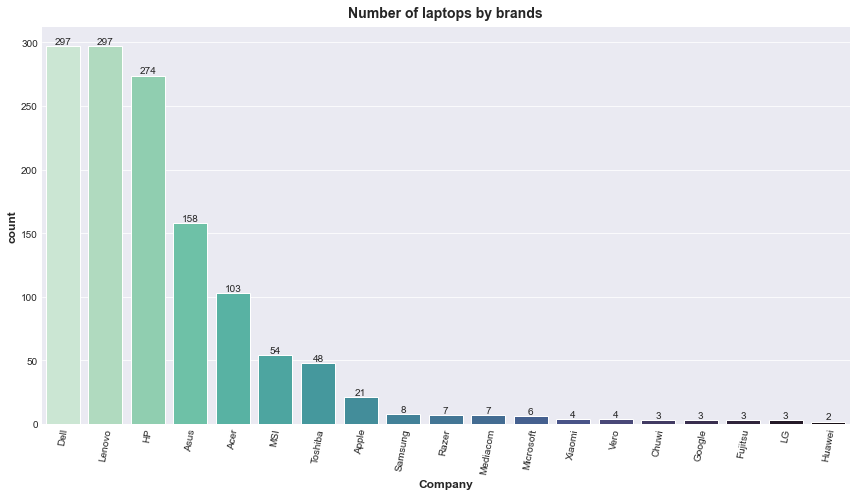

In [35]:
fig, ax  = plt.subplots(figsize=(12,7))
ax=sns.countplot(x='Company', data=laptops, palette='mako_r', order = laptops['Company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

most sold laptops are dell , lenovo, HP and followed by Asus, Acer, MSI, Toshiba and apple. other laptops are sold in a very less quantity 

what type of laptops is mostly used ?

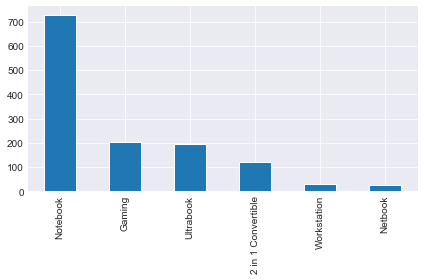

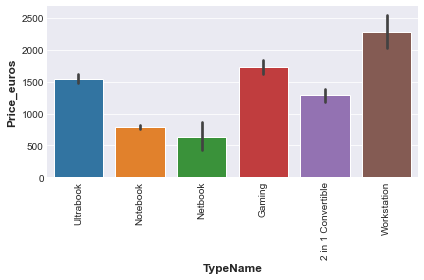

Most laptops are notebooks, which make 55.84% of the total laptops


In [36]:
#checking the feautre typename and its relation with our target variable 
laptops['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()
#we will once again see the average price of the laptop for each type of laptop

sns.barplot(x=laptops['TypeName'] , y= laptops['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()
"""The most selling laptops are Notebook and if we see the plot with price_euros than we understand that it is budget 
friendly laptop and hence most selling one .there are six type of laptops , the most sold laptops are notebook and
workstation, whereas netbook are least sold .

workstation are the most expensive , followed by ultrabook.
netbook and notebook are more economical"""


print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(laptops[laptops['TypeName']=='Notebook'])*100/len(laptops)))


Analyzing the size feature of the laptop

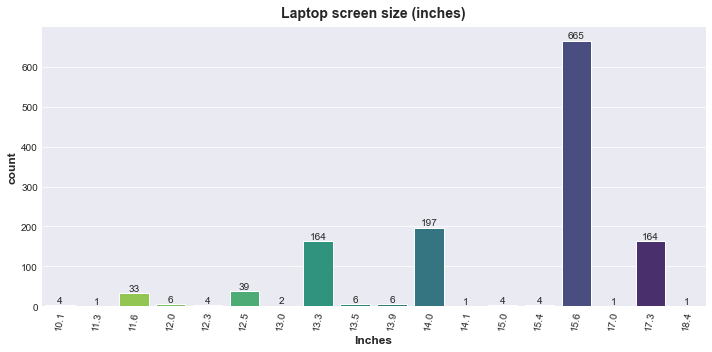

In [37]:
#which size is most popular?
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Inches', data=laptops, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [38]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(laptops[laptops['Inches']==15.6])*100/len(laptops)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


Their are laptops with very unconventional size and hence we will only keep those laptops in dataset for which the sizes are common

In [39]:
inches_list = laptops['Inches'].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

We will keep laptops with these 6 sizes!

In [40]:
laptops_clean = laptops_clean[laptops_clean['Inches'].isin(inches_list)]

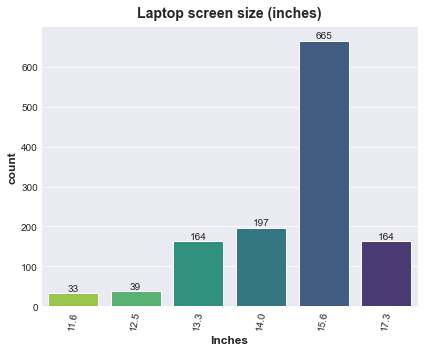

In [41]:
fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='Inches', data=laptops_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [42]:
print('We removed {} outliers!'.format(len(laptops)-len(laptops_clean)))

We removed 40 outliers!


how is weight distributed among the laptops

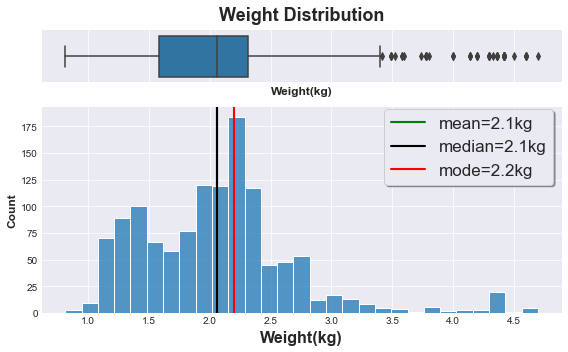

In [43]:
visual(laptops_clean, 'Weight(kg)', 'Weight Distribution','kg')

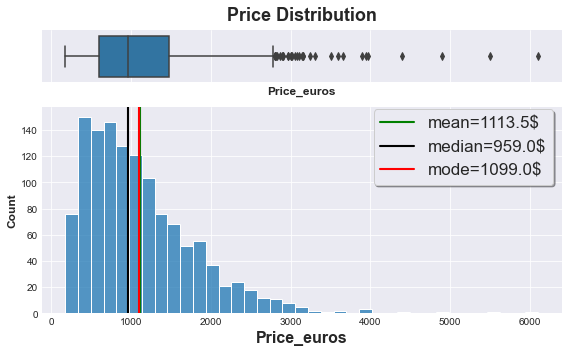

In [44]:
#seeing the distribution of the price
visual(laptops_clean, 'Price_euros', 'Price Distribution','$')

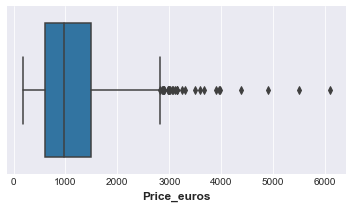

In [45]:
fig, ax  = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='Price_euros', data=laptops)

Their are many outliars in the price columns and hence this may affect our analysis

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

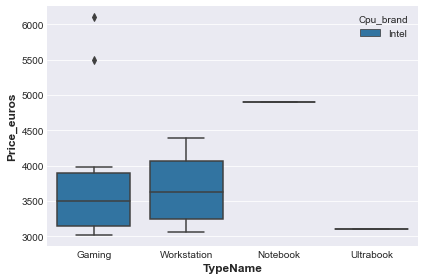

In [46]:
sns.boxplot(x='TypeName', y='Price_euros', data=laptops[laptops['Price_euros']>3000], hue='Cpu_brand')

Most of the intel CPu are gaming and workstation. their is only one model for notebook and ultrabook with the Price of 4900 and 3200. Their are two outliars in the gaming laptops as well with the price of 5500 and 6100.

In [47]:
laptops[laptops['Price_euros']>4500]

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,1,0,254.671349,Touchscreen,2.9,Intel,0,1000,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,0,1,282.423996,IPSPanel,3.1,Intel,0,1000,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,1,0,254.671349,Touchscreen,2.9,Intel,0,512,Nvidia


The expensive laptops are razer blade pro gaming and lenovo thinkpad P51. 

Distribution of ram among the price 

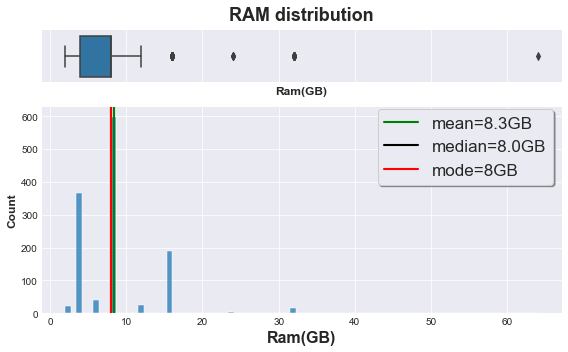

In [48]:
visual(laptops_clean, 'Ram(GB)','RAM distribution','GB')

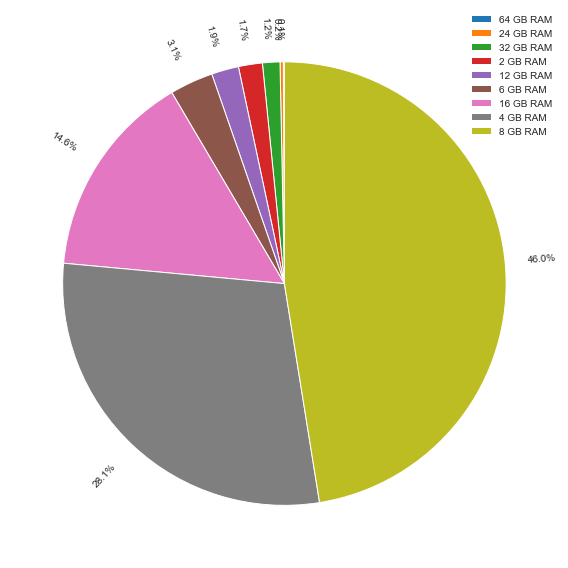

In [49]:
ram_sales = laptops_clean.groupby('Ram(GB)').count().sort_values(by = 'Company', ascending = True)
sales_pct = list(map(lambda x: (x/1302)*100, ram_sales.Company ))

fig4, ax4 = plt.subplots(figsize=(10,8))
ax4.pie(sales_pct, startangle= 90, labels = list(map(lambda x: f'{x:.1f}%',sales_pct)), rotatelabels= True)
ax4.legend(list(map(lambda x: f'{x} GB RAM',ram_sales.index)), loc = 'best')
plt.show()

In [50]:

print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(laptops[laptops['Ram(GB)']==8])*100/len(laptops)))

Most laptops have 8 GB RAM, which make 47.54% of the total laptops


How is Cpu frequency distributed among people ?

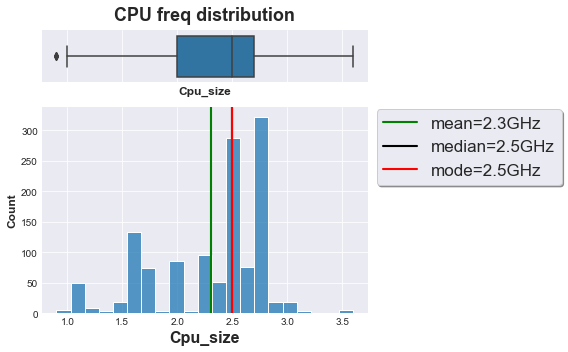

In [51]:
visual(laptops_clean, 'Cpu_size','CPU freq distribution','GHz')

In [52]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(laptops[laptops['Cpu_size']==2.5])*100/len(laptops),2)))

Most laptops have 2.5 GHz CPU, which make 22.5% of the total laptops


# 5. Multivariate Outliars Detection

 Price vs RAM

In [53]:
#we define our own function to get the linear relation between two variables and plot it.

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(laptops[col_x],laptops[col_y])
    sns.regplot(x=col_x, y = col_y, data=laptops, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

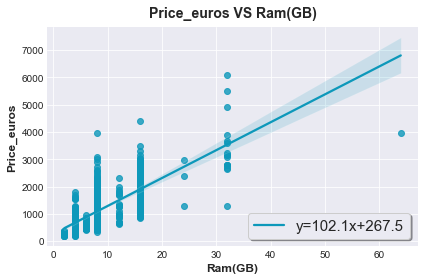

In [54]:
slope, intercept = lr_plot(laptops_clean,'Ram(GB)','Price_euros', 'lower right')

In [55]:
laptops_clean[laptops_clean['Ram(GB)']>60]

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Gpu_brand
1066,Asus,ROG G701VO,Gaming,17.3,Intel Core i7 6820HK,64,Nvidia GeForce GTX 980,Windows 10,3.58,3975.0,0,1,127.335675,IPSPanel,2.7,Intel,0,1000,Nvidia


The outlier value is a very high end gaming ASUS pc. We can drop it.

In [56]:
laptops_clean = laptops_clean[laptops_clean['Ram(GB)']<60]

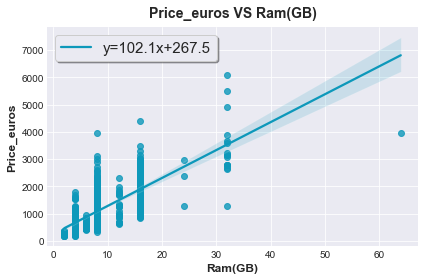

In [57]:
slope, intercept = lr_plot(laptops_clean,'Ram(GB)','Price_euros', 'upper left')

By removing the outlier value we can see that the slope increases and the intercept decreases.

According to the slope, every GB of RAM added on the PC adds roughly 107$ to the laptop value.

Price VS CPU Brand VS GPU Brand

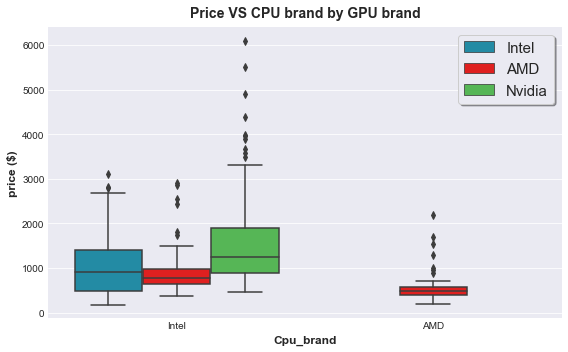

In [58]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='Cpu_brand', y='Price_euros', data=laptops, hue='Gpu_brand', palette=cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:

1. Laptops with Intel CPUs are more expensive.
2. Laptops with an AMD CPUs also have and AMD GPUs are generally more economical.
3. Laptops with Nvidia GPUs are more expensive , which we saw when we were dealing with GPU column.


Which are the TOP 15 most common CPUs?


In [59]:
cpu_list = laptops_clean['Cpu'].value_counts()[:15].index.tolist()

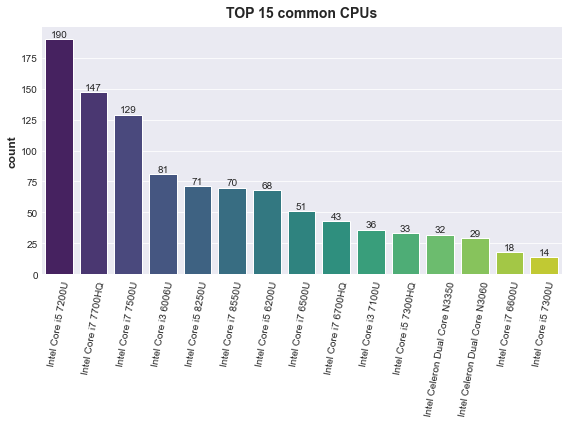

In [60]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Cpu', data=laptops_clean[laptops_clean['Cpu'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

we can see that all the top 15 CPU are from intel.

What is the average price of laptops by company?


In [61]:
laptops['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

considering companies with more number of laptops

In [62]:
company_list = laptops['Company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

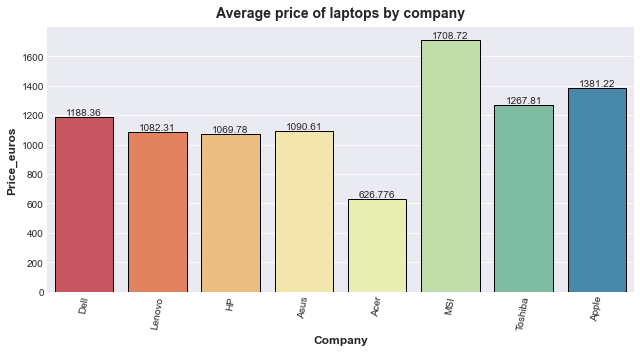

In [63]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='Company', y='Price_euros', data=laptops_clean[laptops_clean['Company'].isin(company_list)],
                order=company_list, 
                palette='Spectral', 
                ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

1. MSI laptops are more expensive than others followed by apple and toshiba.
2. Acer laptops are more economical with the price of 626.776

## Correlation Marix

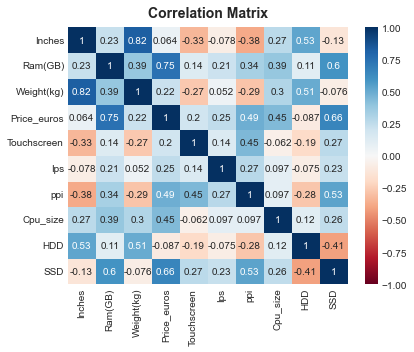

In [64]:
plt.figure(figsize=(6,5))
sns.heatmap(laptops_clean.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Insights from correlation matrix
1. inches and weight are highly correlated ,which is very obvious that a bigger laptop will have more weight.
2. Ram and price euros have a good correlation , laptops with higher ram are more expensive
3. Price is fairly correlated with SSD , that signifies that having a SSD drive can increase the price of the laptop.


# Data Preparation For ML Modeling

We will use clean file for data pre-processing

In [65]:
laptops1=laptops_clean.copy()

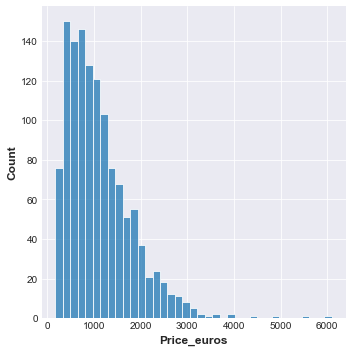

In [66]:
sns.displot(laptops1['Price_euros'])

In [67]:
#we need to make the data symmetric as it is skewed

laptops1['Price_euros']=np.log(laptops1['Price_euros'])

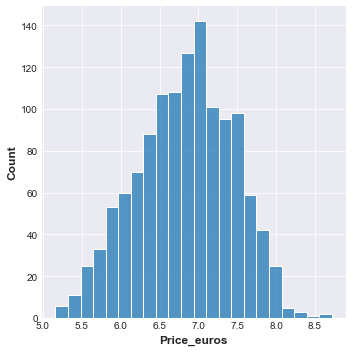

In [68]:
sns.displot(laptops1['Price_euros'])

In [69]:
laptops1=laptops1.fillna('NaN')

# 6. Categorical feature encoding

In [70]:
laptops1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 1301
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1261 non-null   object 
 1   Product      1261 non-null   object 
 2   TypeName     1261 non-null   object 
 3   Inches       1261 non-null   float64
 4   Cpu          1261 non-null   object 
 5   Ram(GB)      1261 non-null   int64  
 6   Gpu          1261 non-null   object 
 7   OpSys        1261 non-null   object 
 8   Weight(kg)   1261 non-null   float64
 9   Price_euros  1261 non-null   float64
 10  Touchscreen  1261 non-null   int64  
 11  Ips          1261 non-null   int64  
 12  ppi          1261 non-null   float64
 13  screentype   1261 non-null   object 
 14  Cpu_size     1261 non-null   float64
 15  Cpu_brand    1261 non-null   object 
 16  HDD          1261 non-null   int64  
 17  SSD          1261 non-null   int64  
 18  Gpu_brand    1261 non-null   object 
dtypes: flo

Their are total 10 variables with object datatype .To deal with this variable we can convert this to numerical data type by one hot encoding as they are not ordinal data type. But performng One hot enchoding to this many features will lead to so many extra columns and rows which may affect our analysis and therefore we will consider label encoding too.

In [71]:
catCols =  ['Company','Product','TypeName','Cpu','Gpu','OpSys','screentype','Gpu_brand','Cpu_brand']

In [72]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(laptops1, columns=catCols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (1261, 827)


In [73]:
#Label encoding
en = LabelEncoder()
for cols in catCols:
    laptops1[cols] = en.fit_transform(laptops1[cols])
print('Dataframe encoded by Label encoding dimension : ', laptops1.shape)

Dataframe encoded by Label encoding dimension :  (1261, 19)


In [74]:
laptops1.head()

,Company,Product,TypeName,Inches,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,Touchscreen,Ips,ppi,screentype,Cpu_size,Cpu_brand,HDD,SSD,Gpu_brand
0,1,295,4,13.3,46,8,50,7,1.37,7.200194,0,1,226.983005,1,2.3,1,0,128,1
1,1,296,4,13.3,46,8,44,7,1.34,6.801216,0,0,127.677940,3,1.8,1,0,0,1
2,6,49,3,15.6,52,8,46,3,1.86,6.354370,0,0,141.211998,3,2.5,1,0,256,1
4,1,295,4,13.3,46,8,51,7,1.37,7.497540,0,1,226.983005,1,3.1,1,0,256,1
5,0,57,3,15.6,11,4,12,4,2.10,5.991465,0,0,100.454670,3,3.0,0,500,0,0


# 7. Data Preparation

In [75]:
X=laptops1.drop('Price_euros', axis = 1).values

In [76]:
y=laptops1['Price_euros'].values

##  Train -Test split

importing important libraries

In [77]:
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#!pip install optuna 
import optuna

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

seed=42

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

Train Validation Split

In [79]:
#Moreover, we define an additional validation set, which will be used to monitor overfitting.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = seed)

# 8. Training Models

## 8.1  Random Forest Regressor

In [80]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=15)

In [82]:
y_pred_rf = rf.predict(X_test)

In [83]:
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print("RMSE using RF: {} £ ".format(np.round(np.sqrt(mse_rf)),4))

RMSE using RF: 282.0 £ 


In [84]:
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))

R2 using Random Forest: 90.31 %


## 8.2 Decision Tree Regressor

In [85]:
dt = DecisionTreeRegressor( max_depth=500, max_features=15)

In [86]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=500, max_features=15)

In [87]:
y_pred_dt = dt.predict(X_test)

In [88]:
mse_dt = mean_squared_error(np.exp(y_test), np.exp(y_pred_dt))
print("RMSE using Decision Tree: {} £ ".format(np.round(np.sqrt(mse_dt)),4))

RMSE using Decision Tree: 366.0 £ 


In [89]:
print("R2 using Decision Tree: {:.2f} %".format(np.round(r2_score(y_test, y_pred_dt),4)*100))

R2 using Decision Tree: 79.49 %


## 8.3 Linear Regression

In [90]:
reg = LinearRegression()

In [91]:
reg.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred_reg = reg.predict(X_test)

In [93]:
mse_reg = mean_squared_error(np.exp(y_test), np.exp(y_pred_reg))
print("RMSE using Linear Regression: {} £ ".format(np.round(np.sqrt(mse_reg)),4))

RMSE using Linear Regression: 381.0 £ 


In [94]:
print("R2 using Linear Regression: {:.2f} %".format(np.round(r2_score(y_test, y_pred_reg),4)*100))

R2 using Linear Regression: 79.09 %


## 8.4 XG Boost Regressor

In [95]:
XG = XGBRegressor()

In [96]:
XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [97]:
y_pred_XG = XG.predict(X_test)
mse_XG = mean_squared_error(np.exp(y_test), np.exp(y_pred_XG))
print("RMSE using XG Boost: {} £ ".format(np.round(np.sqrt(mse_XG)),4))
print("R2 using XG Boost: {:.2f} %".format(np.round(r2_score(y_test, y_pred_XG),4)*100))

RMSE using XG Boost: 244.0 £ 
R2 using XG Boost: 91.02 %


###  Feature Importance

when we are dealing with random forest regressor it is better to see feature importance . It helps us to understand due to which feature our model is learning the most .

we will see those features(column name) from the x_train

In [98]:
feature_name_list=laptops1.drop('Price_euros', axis = 1).columns

We use the column names as the feature names, so that in the following plot we will be able to see the actual feature names

In [99]:
rf.feature_names = feature_name_list

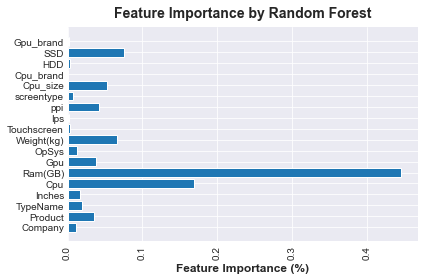

In [100]:
plt.barh(rf.feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')
plt.show()

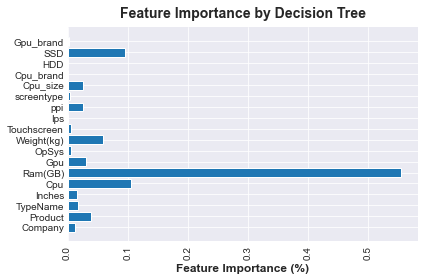

In [101]:
dt.feature_names = feature_name_list
plt.barh(dt.feature_names,dt.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Decision Tree')
plt.xlabel('Feature Importance (%)')
plt.show()

Linear Regrression do not have Feature_importance as an attribute

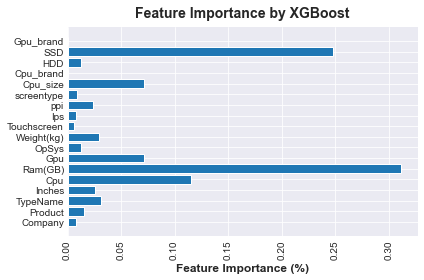

In [102]:
XG.feature_names = feature_name_list
plt.barh(XG.feature_names,XG.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by XGBoost')
plt.xlabel('Feature Importance (%)')
plt.show()

##  8.5  XGBoost Optimization with OPTUNA

XG boost Optimisation with optuna is used as it has more accuracy in the model than XG Boost and hence gives us more precise prediction .

In [103]:
#As optuna is a black-box optimizer that means it needs a objective function which returns a numerical value that helps in hypertunning of parameters
#trial : SPecifies which hyperparameter should be tuned it gives accuracy , which shows performance of the trial

#this function will return the rmse value for the Algorithm



def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dvalid = xgboost.DMatrix(X_val, label=y_val)

    param = {
        'objective' : 'reg:squarederror',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }


    model = xgboost.XGBRegressor(**param)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)   
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse

In [104]:
#this will give number of trials to the model and make sure that we choose the best trial from it where different parameter are used


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2022-05-19 15:38:24,288] A new study created in memory with name: no-name-647b4281-46dd-4a0e-bc53-5db2e86a069d
/Users/simranjain/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2022-05-19 15:38:24,822] Trial 0 finished with value: 0.21633642137270664 and parameters: {'lambda': 0.002763754691188093, 'alpha': 0.0011882073163260551, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.1, 'n_estimators': 1000, 'max_depth': 3, 'min_child_weight': 81}. Best is trial 0 with value: 0.21633642137270664.
/Users/simranjain/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings

Number of finished trials:  100
Best trial:
  Value: 0.1647326545079989
  Params: 
    lambda: 0.9111994460724697
    alpha: 0.03144852164426329
    colsample_bytree: 0.5
    subsample: 0.4
    learning_rate: 0.05
    n_estimators: 2000
    max_depth: 6
    min_child_weight: 2


In [105]:
params

[0.9111994460724697, 0.03144852164426329, 0.5, 0.4, 0.05, 2000, 6, 2]

In [106]:
lambda_opt = params[0]
alpha_opt = params[1]
colsample_bytree_opt = params[2]
subsample_opt = params[3]
learning_rate_opt = params[4]
n_estimators_opt = params[5]
max_depth_opt = params[6]
min_child_weight_opt = params[7]

In [107]:
xgb = XGBRegressor(reg_lambda = lambda_opt,
                   alpha = alpha_opt,
                   colsample_bytree = colsample_bytree_opt,
                   subsample_opt = subsample_opt,
                   learning_rate = learning_rate_opt,
                   n_estimators = n_estimators_opt,
                   max_depth = max_depth_opt,
                   min_child_weight = min_child_weight_opt)

In [108]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)

/Users/simranjain/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15:39:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "subsample_opt" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=0.03144852164426329, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0.0314485207, ...)

In [109]:
y_pred_xgb = xgb.predict(X_test) 

In [110]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))

In [111]:
print("RMSE with XGBoost with optuna: {:.2f} £".format(np.round(np.sqrt(mse_xgb),2))) 

RMSE with XGBoost with optuna: 217.22 £


In [112]:
print("R2 with XGBoost with Optuna: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))

R2 with XGBoost with Optuna: 93.08 % 


In [113]:
xgb.feature_names = feature_name_list

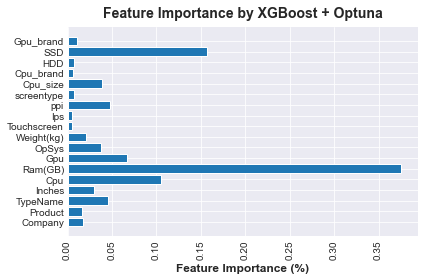

In [114]:

plt.barh(xgb.feature_names,xgb.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by XGBoost + Optuna')
plt.xlabel('Feature Importance (%)')
plt.show()

## 8.6 Support Vector Regression

In [115]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,y_train)


SVR()

In [116]:
y_pred_regressor = regressor.predict(X_test)

In [117]:
mse_regressor = mean_squared_error(np.exp(y_test), np.exp(y_pred_regressor))
print("RMSE using Support Vector Regression: {} £ ".format(np.round(np.sqrt(mse_regressor)),4))

RMSE using Support Vector Regression: 450.0 £ 


In [118]:
print("R2 using Support Vector Regression: {:.2f} %".format(np.round(r2_score(y_test, y_pred_regressor),4)*100))

R2 using Support Vector Regression: 68.00 %


In [119]:
# since the R2 score is really low we wont consider this model

# 9. Result summary

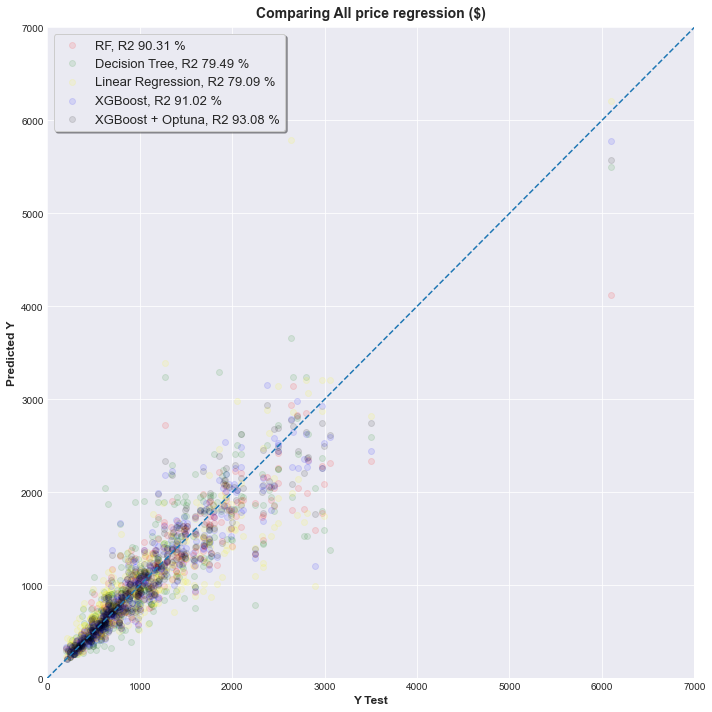

In [120]:
#plotting all the algorithms
plt.figure(figsize = (10,10))
plt.scatter(np.exp(y_test), np.exp(y_pred_rf), alpha=0.1, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_dt), alpha=0.1, color='green',label='Decision Tree, R2 {:.2f} %'.format(r2_score(y_test, y_pred_dt)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_reg), alpha=0.1, color='yellow',label='Linear Regression, R2 {:.2f} %'.format(r2_score(y_test, y_pred_reg)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_XG), alpha=0.1, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_XG)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.1, color='black',label='XGBoost + Optuna, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
#plt.scatter(np.exp(y_test), np.exp(y_pred_regressor), alpha=0.1, color='purple',label='Support Vector Regressor, R2 {:.2f} %'.format(r2_score(y_test, y_pred_regressor)*100))
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Comparing All price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

Plot for Highest R2 Score

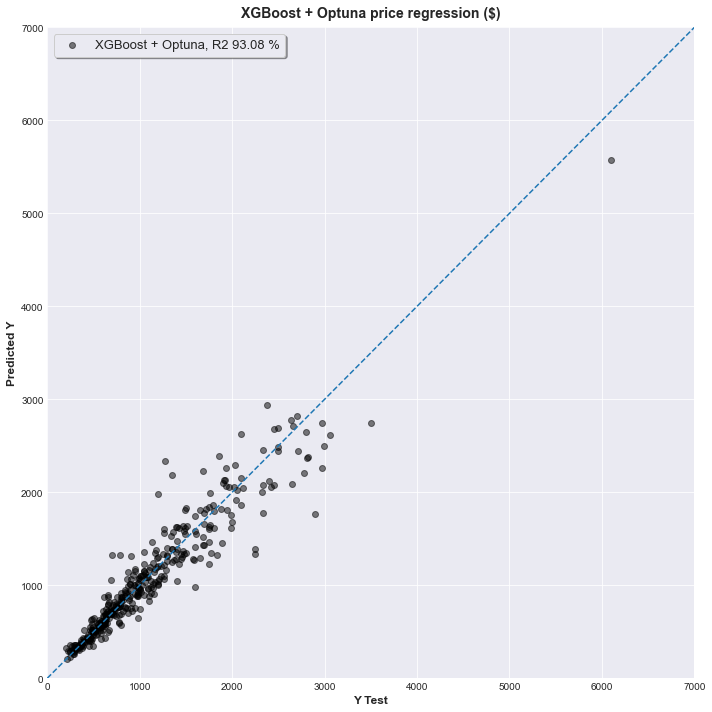

In [121]:
#plotting final output

plt.figure(figsize = (10,10))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='black',label='XGBoost + Optuna, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))

plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('XGBoost + Optuna price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

In [122]:
#final RMSE of all models
print("RMSE using RF: {:.2f} £ ".format(np.sqrt(mse_rf)))

print("RMSE using Decision Tree: {} £ ".format(np.round(np.sqrt(mse_dt)),4))
print("RMSE using Linear Regression: {} £ ".format(np.round(np.sqrt(mse_reg)),4))
print("RMSE using XG Boost: {} £ ".format(np.round(np.sqrt(mse_XG)),4))
print("RMSE with XGBoost with optuna : {:.2f} £".format(np.sqrt(mse_xgb)))
print("RMSE using Support Vector Regression: {} £ ".format(np.round(np.sqrt(mse_regressor)),4))


RMSE using RF: 281.61 £ 
RMSE using Decision Tree: 366.0 £ 
RMSE using Linear Regression: 381.0 £ 
RMSE using XG Boost: 244.0 £ 
RMSE with XGBoost with optuna : 217.22 £
RMSE using Support Vector Regression: 450.0 £ 


In [123]:
#final r2 score of all models
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))
print("R2 using Decision Tree: {:.2f} %".format(np.round(r2_score(y_test, y_pred_dt),4)*100))
print("R2 using Linear Regression: {:.2f} %".format(np.round(r2_score(y_test, y_pred_reg),4)*100))
print("R2 using XG Boost: {:.2f} %".format(np.round(r2_score(y_test, y_pred_XG),4)*100))
print("R2 with XGBoost with Optuna: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))
print("R2 using Support Vector Regression: {:.2f} %".format(np.round(r2_score(y_test, y_pred_regressor),4)*100))

R2 using Random Forest: 90.31 %
R2 using Decision Tree: 79.49 %
R2 using Linear Regression: 79.09 %
R2 using XG Boost: 91.02 %
R2 with XGBoost with Optuna: 93.08 % 
R2 using Support Vector Regression: 68.00 %


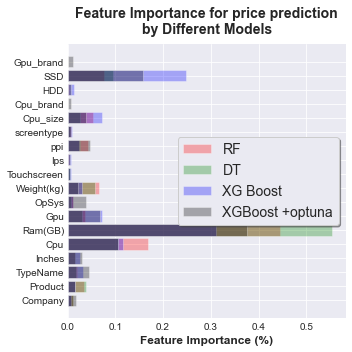

In [124]:
#plotting feature importance for different models
plt.figure(figsize=(5,5))
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.3, label='RF', color='red')

plt.barh(dt.feature_names,dt.feature_importances_, alpha=0.3, label='DT', color='green')

plt.barh(XG.feature_names,XG.feature_importances_, alpha=0.3, label='XG Boost', color='blue')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.3, label='XGBoost +optuna', color='black')
plt.legend(loc='center right',ncol=1, fontsize=14, fancybox=True, shadow=True, frameon=True)
plt.title('Feature Importance for price prediction\nby Different Models')
plt.xlabel('Feature Importance (%)')
plt.show()

We can see that RF chose RAM, CPU, weight and product(name) as the most important features.
In the case of XGBoost, the most important features are memory_1_type, RAM, resolution, cpu, typename and gpu brand.
It is also worth noticing XGBoost didnt give as much importance to RAM and CPU as RF did. It spreaded more the feature importance among other features.

In [125]:
xgb.feature_names = laptops1.drop('Price_euros', axis = 1).columns
feat_df= pd.DataFrame({'feature': xgb.feature_names,'importance':xgb.feature_importances_})


In [126]:
sorted_df=feat_df.sort_values('importance', ascending=False)

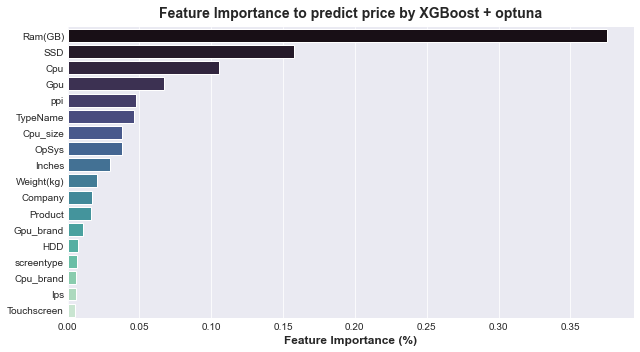

In [127]:
#feature importance of final model
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=sorted_df, palette='mako')
plt.title('Feature Importance to predict price by XGBoost + optuna')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')
plt.show()